# **Dependacies**
kaggle - ships image dataset 사용한 CNN 정확도 87% 모델

In [9]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import os
import random

# **Importing Training Data**

In [10]:
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']

In [11]:
data_image = '/kaggle/input/ships-dataset/Ships dataset/train/images'
data_label = '/kaggle/input/ships-dataset/Ships dataset/train/labels'
traindata = []
pathi = os.path.join(data_image)
pathl = os.path.join(data_label)

for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    traindata.append(image)
    
    

In [12]:
trainlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    trainlabel.append(a)

In [13]:
data = []
for i in range(0,len(trainlabel)):
    traindata[i] = traindata[i]/255
    data.append((traindata[i], trainlabel[i]))

random.shuffle(data)
images, labels =  [], []
for a, b in data:
    images.append(a)
    labels.append(b)
    


# **Visualize the Data**

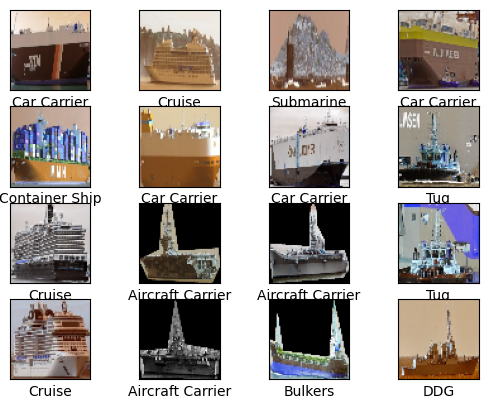

In [14]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel(ClassNames[labels[i]])
plt.show()

# **Importing Validation Data**

In [15]:
data_image = '/kaggle/input/ships-dataset/Ships dataset/valid/images'
data_label = '/kaggle/input/ships-dataset/Ships dataset/valid/labels'
validdata = []
pathi = os.path.join(data_image)
pathl = os.path.join(data_label)

for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    validdata.append(image)
    
validlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    validlabel.append(a)
    
validation = []
for i in range(0,len(validlabel)):
    validdata[i] = validdata[i]/255
    validation.append((validdata[i], validlabel[i]))

random.shuffle(validation)
validationimages, validationlabels =  [], []
for a, b in validation:
    validationimages.append(a)
    validationlabels.append(b)

In [16]:
images = np.array(images)
labels = np.array(labels)
validationimages = np.array(validationimages)
validationlabels = np.array(validationlabels)

# **Model**

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

c:\Users\pc\anaconda3\envs\rltrader\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Training the Model**

In [18]:
model.fit(images,labels,batch_size = 32,epochs=5,validation_data=(validationimages,validationlabels))

loss, accuracy = model.evaluate(images,labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/5
232/232 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.4630 - loss: 1.5936 - val_accuracy: 0.7750 - val_loss: 0.7276
Epoch 2/5
232/232 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.8361 - loss: 0.5130 - val_accuracy: 0.8389 - val_loss: 0.5477
Epoch 3/5
232/232 ━━━━━━━━━━━━━━━━━━━━ 29s 126ms/step - accuracy: 0.9201 - loss: 0.2574 - val_accuracy: 0.8244 - val_loss: 0.6990
Epoch 4/5
232/232 ━━━━━━━━━━━━━━━━━━━━ 33s 144ms/step - accuracy: 0.9450 - loss: 0.1693 - val_accuracy: 0.8360 - val_loss: 0.7350
Epoch 5/5
232/232 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - accuracy: 0.9697 - loss: 0.0980 - val_accuracy: 0.8171 - val_loss: 0.9181
232/232 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9545 - loss: 0.1253
Loss: 0.12845328450202942
Accuracy: 0.9526060223579407


# **Exporing the Model**

In [19]:
model.save('ShipClassifierV1.h5')


# **Loading the model**

In [20]:
model = models.load_model('ShipClassifierV1.h5')

# **Importing testing Data**

In [21]:
data_image = '/kaggle/input/ships-dataset/Ships dataset/test/images'
data_label = '/kaggle/input/ships-dataset/Ships dataset/test/labels'
testdata = []
pathi = os.path.join(data_image)
pathl = os.path.join(data_label)

for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    testdata.append(image)
    
testlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    testlabel.append(a)
    
testing = []
for i in range(0,len(testlabel)):
    testdata[i] = testdata[i]/255
    testing.append((testdata[i], testlabel[i]))

random.shuffle(testing)
testingimages, testinglabels =  [], []
for a, b in testing:
    testingimages.append(a)
    testinglabels.append(b)
    
testinglabels = np.array(testinglabels)
testingimages = np.array(testingimages)

# **Testing the model**

In [22]:
loss, accuracy = model.evaluate(testingimages,testinglabels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8221 - loss: 0.8552
Loss: 0.92434161901474
Accuracy: 0.8215222954750061


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


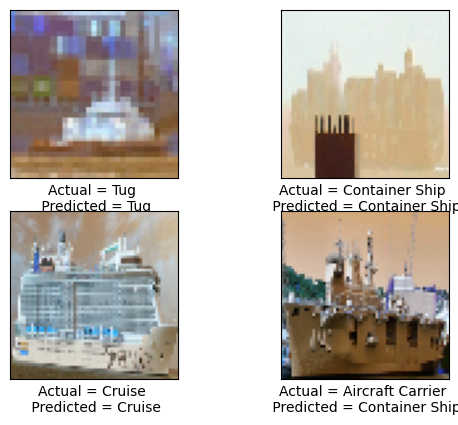

In [23]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testingimages[i],cmap=plt.cm.binary)
    pred = model.predict(np.array([testingimages[i]]))
    index = np.argmax(pred)
    plt.xlabel(f"Actual = {ClassNames[testinglabels[i]]} \n Predicted = {ClassNames[index]}")
    
plt.show()

# **FGSM-nontargetted**

In [24]:
# import the necessary packages
from tensorflow.keras.losses import MSE
import tensorflow as tf

def generate_image_adversary(model, image, label, eps=2 / 255.0):
	# cast the image
	image = tf.cast(image, tf.float32)
 
 	# record our gradients
	with tf.GradientTape() as tape:
		# explicitly indicate that our image should be tacked for
		# gradient updates
		tape.watch(image)
  
		# use our model to make predictions on the input image and
		# then compute the loss
		pred = model(image)
		loss = MSE(label, pred)
  
  	# calculate the gradients of loss with respect to the image, then
	# compute the sign of the gradient
	gradient = tape.gradient(loss, image)
	signedGrad = tf.sign(gradient)
 
	# construct the image adversary
	adversary = (image + (signedGrad * eps)).numpy()
 
	# return the image adversary to the calling function
	return adversary

In [25]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

In [26]:
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']

In [27]:
model = load_model('ShipClassifierV1.h5')

In [28]:
data_image = '/kaggle/input/ships-dataset/Ships dataset/test/images'
data_label = '/kaggle/input/ships-dataset/Ships dataset/test/labels'
testdata = []
testlabel = []

In [29]:
for file in os.listdir(data_image):
    file_p = os.path.join(data_image, file)
    image = cv2.imread(file_p)
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR)
    testdata.append(image / 255.0)

for file in os.listdir(data_label):
    file_p = os.path.join(data_label, file)
    with open(file_p, "r") as f:
        label = int(f.read(1))
        testlabel.append(label)

testdata = np.array(testdata)
testlabel = np.array(testlabel)


In [30]:
for i in np.random.choice(np.arange(0, len(testdata)), size=(10,)):
    image = testdata[i]
    label = testlabel[i]

    # 이미지에 대한 적대적 샘플 생성
    adversary = generate_image_adversary(model, image.reshape(1, 64, 64, 3), label, eps=0.1)
    pred = model.predict(adversary)
    
    # 예측된 숫자 레이블을 클래스 이름으로 변환
    imagePred = ClassNames[label]
    adversaryPred = ClassNames[pred[0].argmax()]

    # 확신도 계산
    confidence = pred[0].max() * 100  # 확률을 백분율로 변환
    color = (0, 255, 0)

    # 예측이 다를 경우 빨간색으로 표시
    if imagePred != adversaryPred:
        color = (0, 0, 255)

    # 이미지를 [0, 255] 범위로 스케일 조정
    adversary = adversary.reshape((64, 64, 3)) * 255
    adversary = np.clip(adversary, 0, 255).astype("uint8")
    image = (image * 255).astype("uint8")

    # 이미지 및 적대적 이미지에 클래스 이름과 확신도 표시
    image = cv2.resize(image, (384, 384))
    adversary = cv2.resize(adversary, (384, 384))

    cv2.putText(image, f"{imagePred}", (2, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)
    cv2.putText(adversary, f"{adversaryPred} ({confidence:.2f}%)", (2, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)

    output = np.hstack([image, adversary])
    cv2.imshow("FGSM Adversarial Images", output)
    cv2.waitKey(0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


# load_data

In [32]:
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras import models

In [33]:
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']

In [34]:
# Load and prepare the dataset (assuming the load_data function is defined as before)
def load_data(data_image_path, data_label_path):
    data = []
    images = []
    labels = []
    
    for file in os.listdir(data_image_path):
        file_p = os.path.join(data_image_path, file)
        image = cv2.imread(file_p)
        image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR)
        images.append(image)
    
    for file in os.listdir(data_label_path):
        file_p = os.path.join(data_label_path, file)
        with open(file_p, "r") as f:
            label = int(f.read(1))
        labels.append(label)
    
    images = np.array(images) / 255.0
    labels = np.array(labels)
    
    return images, labels

In [35]:
# Load data (adjust the paths to your specific dataset locations)
test_images, test_labels = load_data('/kaggle/input/ships-dataset/Ships dataset/test/images', '/kaggle/input/ships-dataset/Ships dataset/test/labels')

In [36]:
# Load the trained model
model = models.load_model('ShipClassifierV1.h5')


# **generate_image_adversary_targeted**

In [37]:
import numpy as np
import cv2

In [38]:
# Function to generate adversarial example with a targeted attack
# Targeted attack using FGSM method
def generate_image_adversary_targeted(model, image, target_label, eps=2 / 255.0):
    # Cast the image to float32
    image = tf.cast(image, tf.float32)
 
    # Record gradients with respect to the image
    with tf.GradientTape() as tape:
        # Watch the image for gradient updates
        tape.watch(image)
  
        # Use the model to make predictions on the input image
        pred = model(image)
        
        # Compute the loss as the mean squared error between the target label and the prediction
        target_one_hot = tf.one_hot(target_label, depth=pred.shape[-1])
        loss = tf.keras.losses.MSE(target_one_hot, pred)
  
    # Calculate the gradients of the loss with respect to the image
    gradient = tape.gradient(loss, image)
    
    # Compute the sign of the gradient
    signedGrad = tf.sign(gradient)
 
    # Construct the adversarial image by adding the signed gradient to the original image
    adversary = (image + (signedGrad * eps)).numpy()
 
    # Return the adversarial image to the calling function
    return adversary

target_class는 자유롭게 선택하면 됩니다!
(근데 잘 안먹혀요.. 논타겟보다)
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']입니다.
target_class = 1이면 Aircraft Carrier

In [47]:
# Perform the targeted attack
target_class = 1  # Choose a target class (e.g., 2 for 'Car Carrier')

for i in np.random.choice(np.arange(0, len(test_images)), size=(10,)):
    image = test_images[i]
    label = test_labels[i]

    # Generate adversarial sample targeted at `target_class`
    adversary = generate_image_adversary_targeted(model, image.reshape(1, 64, 64, 3), target_class, eps=0.1)
    pred = model.predict(adversary)
    
    # Convert predicted label to class name
    imagePred = ClassNames[label]
    adversaryPred = ClassNames[pred[0].argmax()]

    # Calculate confidence
    confidence = pred[0].max() * 100  # Convert probability to percentage
    color = (0, 255, 0)

    # Highlight in red if the adversary's prediction matches the target class
    if adversaryPred == ClassNames[target_class]:
        color = (0, 0, 255)
        
    # Scale the image back to [0, 255]
    adversary = adversary.reshape((64, 64, 3)) * 255
    adversary = np.clip(adversary, 0, 255).astype("uint8")
    image = (image * 255).astype("uint8")

    # Resize images for visualization
    image = cv2.resize(image, (384, 384))
    adversary = cv2.resize(adversary, (384, 384))

    # Add class names and confidence to the images
    cv2.putText(image, f"{imagePred}", (2, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)
    cv2.putText(adversary, f"{adversaryPred} ({confidence:.2f}%)", (2, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)

    # Display the original and adversarial images side by side
    output = np.hstack([image, adversary])
    cv2.imshow("Targeted FGSM Adversarial Images", output)
    cv2.waitKey(0)

cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
